In [2]:
import pygmt
import numpy as np
import pandas as pd

In [3]:
# Metadata to get distances

metadata = pd.read_csv('/home/sdybing/mlaapde/mlaapde_metadata.csv')
pd.set_option('display.max_columns', None)

/tmp/ipykernel_55803/1768784261.py:3: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/home/sdybing/mlaapde/mlaapde_metadata.csv')


In [5]:
# metadata

In [6]:
np_metadata = metadata.to_numpy()
print(np_metadata.shape)

all_phase_ids = np_metadata[:,1]
all_sta_lats = np_metadata[:,9]
all_sta_lons = np_metadata[:,10]
all_origin_times = np_metadata[:,17]
all_source_lats = np_metadata[:,18]
all_source_lons = np_metadata[:,19]

print(all_phase_ids)
print(all_sta_lats)
print(all_sta_lons)
print(all_origin_times)
print(all_source_lats)
print(all_source_lons)

(5101567, 56)
['usc000irgm_GE.SNAA.BH*.--_P' 'usc000irgm_IU.PMSA.BH*.10_Sn'
 'usc000irgm_IU.QSPA.BH*.10_P' ... 'us6000d4ny_IU.COLA.HH*.00_Pn'
 'us6000d4ny_TA.J18K.BH*.--_Pn' 'us6000d4ny_TA.M17K.BH*.--_Pn']
[-71.6707 -64.7744 -89.9289 ... 64.873599 63.465 61.4009]
[-2.8379 -64.0489 144.4382 ... -147.8616 -156.7154 -157.4375]
['2013-07-23 00:23:14.260000+00:00' '2013-07-23 00:23:14.260000+00:00'
 '2013-07-23 00:23:14.260000+00:00' ... '2020-12-31 23:51:21.981000+00:00'
 '2020-12-31 23:51:21.981000+00:00' '2020-12-31 23:51:21.981000+00:00']
[-63.2026 -63.2026 -63.2026 ... 62.3568 62.3568 62.3568]
[-63.6217 -63.6217 -63.6217 ... -151.1274 -151.1274 -151.1274]


In [7]:
# training_rows = [0:3813095]
# validation_rows = [3813096:4555195]
# testing_rows = [4555195:]

In [8]:
# print(all_origin_times[0:3813095]) # training
# print('---------')
# print(all_origin_times[3813096:4555195]) # validation
# print('---------')
# print(all_origin_times[4555195:]) # testing

In [9]:
# print(all_sta_lons[0:3813095])
# print(min(all_sta_lons[0:3813095]))
# print(max(all_sta_lons[0:3813095]))
# print(min(all_sta_lats[0:3813095]))
# print(max(all_sta_lats[0:3813095]))

In [10]:
# metadata.station_latitude[0:3813095]

In [11]:
training_stations = metadata[["station_longitude", "station_latitude"]][0:3813095].drop_duplicates()
validation_stations = metadata[["station_longitude", "station_latitude"]][3813096:4555195].drop_duplicates()
testing_stations = metadata[["station_longitude", "station_latitude"]][4555195:].drop_duplicates()
all_stations = metadata[["station_longitude", "station_latitude"]].drop_duplicates()

print(len(training_stations))
print(len(validation_stations))
print(len(testing_stations))
print(len(all_stations))


2121
1615
1536
2422


In [ ]:
### ----- FIGURE 1 ----- ###

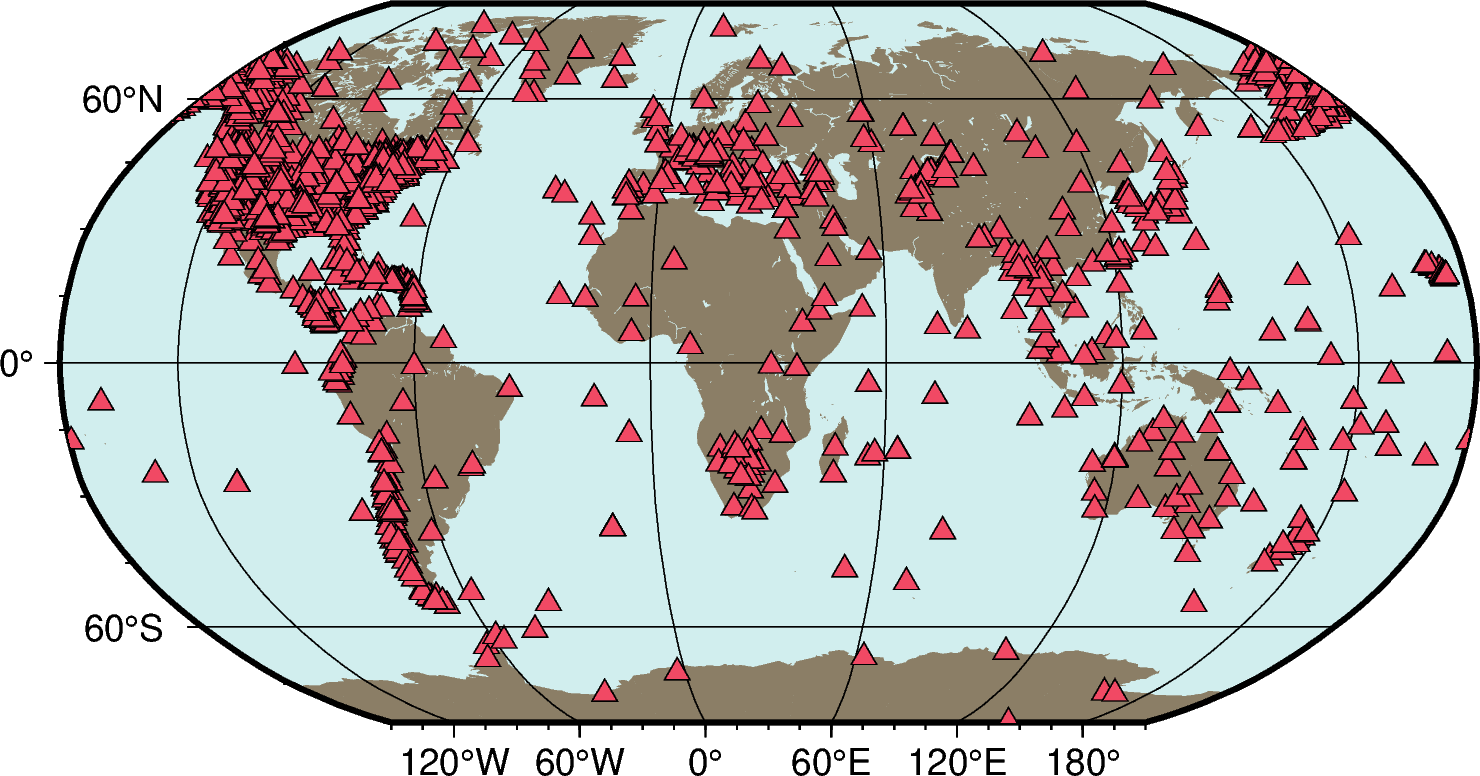

In [14]:
# All stations

fig = pygmt.Figure()
#fig.basemap(region=region, projection="N12c", frame=True)
# Use region "d" to specify global region (-180/180/-90/90)
fig.coast(region=[-150,210,-90,90], projection="N12c", land="wheat4", water="lightcyan2", frame="afg")
fig.plot(x = all_stations.station_longitude, y = all_stations.station_latitude, style="t0.25c", fill="#F14964", pen="black")
#fig.plot(x = training_stations.station_longitude, y = training_stations.station_latitude, style="t0.25c", fill="white", pen="black")
#fig.plot(x = metadata.station_longitude[0:1000], y = metadata.station_latitude[0:1000], style="t0.25c", fill="white", pen="black")
# fig.show();
fig.savefig("/home/sdybing/mlaapde/figures/MLAAPDE_stations_map.png");


In [15]:
# Make earthquake size legend

d = {'lon': [50,80,103], 'lat': [-72,-74,-72], 'mag': [8,7,6]}
legend = pd.DataFrame(data=d)

legend.lon

0     50
1     80
2    103
Name: lon, dtype: int64

189475


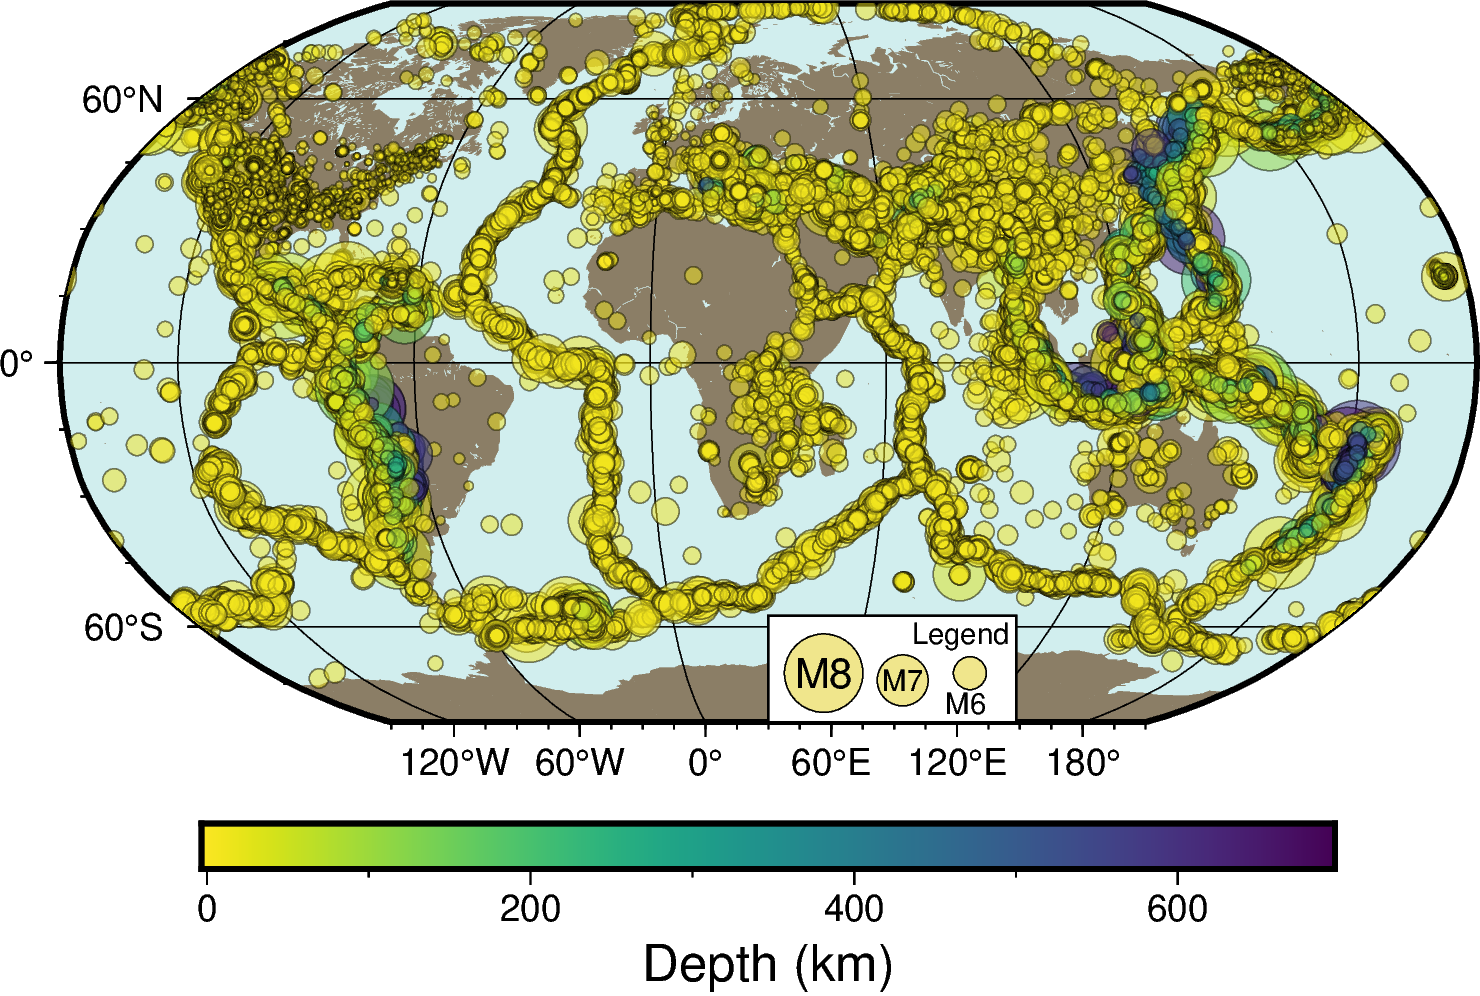

In [16]:
# All earthquakes

all_eqs = metadata[["source_longitude", "source_latitude", "source_magnitude", "source_depth_km"]].drop_duplicates()
print(len(all_eqs))

fig = pygmt.Figure()
# fig.basemap(region=region, projection="N12c", frame=True)
# Use region "d" to specify global region (-180/180/-90/90)
#fig.coast(region="d", projection="N12c", land="wheat4", water="lightcyan2", frame="afg")
fig.coast(region=[-150,210,-90,90], projection="N12c", land="wheat4", water="lightcyan2", frame="afg")
#fig.basemap(frame=['+t"MLAAPDE Earthquakes (Aug. 1, 2013 - Dec. 31, 2020)"'])
pygmt.makecpt(cmap="viridis", series=[all_eqs.source_depth_km.min(), all_eqs.source_depth_km.max()], reverse=True)
fig.plot(x = all_eqs.source_longitude, y = all_eqs.source_latitude, style="cc", fill=all_eqs.source_depth_km, cmap=True, pen="black", size=0.02*(1.55**all_eqs.source_magnitude), transparency = 50)
#fig.plot(x = training_stations.station_longitude, y = training_stations.station_latitude, style="t0.25c", fill="white", pen="black")
#fig.plot(x = metadata.station_longitude[0:1000], y = metadata.station_latitude[0:1000], style="t0.25c", fill="white", pen="black")
fig.colorbar(frame="af+lDepth (km)")

with fig.inset(position="jBL+w2.1c/0.9c+o6c/0c", box="+p0.5+gwhite"):
    pass
# fig.plot(x=legend.lon, y=legend.lat, size=0.02*(1.6**legend.mag), fill='red', style='cc')
#     #pass
#     # Use a plotting method to create a figure inside the inset.
#     fig.plot(x=legend.lon, y=legend.lat, size=0.02*(1.6**legend.mag), fill='red', style='cc')

fig.plot(x=legend.lon, y=legend.lat, size=0.02*(1.55**legend.mag), fill='khaki', pen='black', style='cc')
fig.text(text=['M8'], x=50, y=-72, font='10p,black')
fig.text(text=['M7'], x=80, y=-74, font='7p,black')
fig.text(text=['M6'], x=112, y=-81, font='7p,black')
fig.text(text=['Legend'], x=92, y=-61.5, font='7p,black')

fig.show();

# fig.savefig("/home/sdybing/mlaapde/figures/MLAAPDE_earthquakes_map.png");


In [13]:
hist_catalog = np.genfromtxt('/home/sdybing/mlaapde/2000-2013_catalog.csv', delimiter = ',', dtype = 'str', skip_header = 1) # M7.5+ 01/01/2000 - 07/31/2013
hist_catalog


array([['2000-03-28T11:00:22.510Z', '22.338', '143.73', '126.5', '7.6',
        'mwc', '', 'us', 'usp0009qb4', '2022-04-29T18:35:42.761Z', 'us',
        'hrv'],
       ['2000-05-04T04:21:16.210Z', '-1.105', '123.573', '26', '7.6',
        'mwc', '', 'us', 'usp0009sbh', '2022-04-29T19:16:21.382Z', 'us',
        'hrv'],
       ['2000-06-04T16:28:26.170Z', '-4.721', '102.087', '33', '7.9',
        'mwc', '379', 'us', 'usp0009txv', '2022-04-29T18:39:33.008Z',
        'us', 'hrv'],
       ['2000-06-18T14:44:13.310Z', '-13.802', '97.453', '10', '7.9',
        'mwc', '405', 'us', 'usp0009ut0', '2022-04-29T18:42:02.193Z',
        'us', 'hrv'],
       ['2000-11-16T04:54:56.740Z', '-3.98', '152.169', '33', '8', 'mwc',
        '254', 'us', 'usp000a3qq', '2022-04-29T19:26:13.204Z', 'us',
        'hrv'],
       ['2000-11-16T07:42:16.930Z', '-5.233', '153.102', '30', '7.8',
        'mwc', '294', 'us', 'usp000a3sp', '2022-04-29T19:16:32.829Z',
        'us', 'hrv'],
       ['2000-11-17T21:01:56.490Z',

In [14]:
lats = hist_catalog[:][:,1]
lons = hist_catalog[:][:,2]
depths = hist_catalog[:][:,3]
mags = hist_catalog[:][:,4]

In [15]:
d = {'lon': lons, 'lat': lats, 'mag': mags, 'depth': depths}
hist = pd.DataFrame(data=d, dtype='float')

In [16]:
hist.mag

0     7.6
1     7.6
2     7.9
3     7.9
4     8.0
     ... 
73    7.8
74    7.5
75    8.0
76    7.7
77    8.3
Name: mag, Length: 78, dtype: float64

In [43]:
# Historic earthquakes

fig = pygmt.Figure()
# fig.basemap(region=region, projection="N12c", frame=True)
# Use region "d" to specify global region (-180/180/-90/90)
#fig.coast(region="d", projection="N12c", land="wheat4", water="lightcyan2", frame="afg")
fig.coast(region=[-150,210,-90,90], projection="N12c", land="wheat4", water="lightcyan2", frame="afg")
#fig.basemap(frame=['+t"MLAAPDE Earthquakes (Aug. 1, 2013 - Dec. 31, 2020)"'])
pygmt.makecpt(cmap="viridis", series=[hist.depth.min(), hist.depth.max()], reverse=True)
fig.plot(x = hist.lon, y = hist.lat, style="cc", fill=hist.depth, cmap=True, pen="black", size=0.02*(1.55**hist.mag), transparency = 50)
#fig.plot(x = training_stations.station_longitude, y = training_stations.station_latitude, style="t0.25c", fill="white", pen="black")
#fig.plot(x = metadata.station_longitude[0:1000], y = metadata.station_latitude[0:1000], style="t0.25c", fill="white", pen="black")
fig.colorbar(frame="af+lDepth (km)")

with fig.inset(position="jBL+w2.1c/0.9c+o6c/0c", box="+p0.5+gwhite"):
    pass
# fig.plot(x=legend.lon, y=legend.lat, size=0.02*(1.6**legend.mag), fill='red', style='cc')
#     #pass
#     # Use a plotting method to create a figure inside the inset.
#     fig.plot(x=legend.lon, y=legend.lat, size=0.02*(1.6**legend.mag), fill='red', style='cc')

fig.plot(x=legend.lon, y=legend.lat, size=0.02*(1.55**legend.mag), fill='khaki', pen='black', style='cc')
fig.text(text=['M8'], x=50, y=-72, font='10p,black')
fig.text(text=['M7'], x=80, y=-74, font='7p,black')
fig.text(text=['M6'], x=112, y=-81, font='7p,black')
fig.text(text=['Legend'], x=92, y=-61.5, font='7p,black')

# fig.show();

fig.savefig("/home/sdybing/mlaapde/figures/historic_earthquakes_map.png");


In [40]:
# Historic stations

hist_stainfo = np.load('/home/sdybing/mlaapde/histdata_stainfo_wcoordinates_weventids.npy')

In [41]:
hist_stainfo

array([['IU.GUMO', '144.8684', '13.5893', 'usp0009qb4'],
       ['IU.GUMO', '144.8684', '13.5893', 'usp0009qb4'],
       ['IU.GUMO', '144.8684', '13.5893', 'usp0009qb4'],
       ...,
       ['TA.M48A', '-71.9259', '44.2401', 'usb000h4jh'],
       ['TA.M48A', '-71.9259', '44.2401', 'usb000h4jh'],
       ['II.BORG', '-21.3268', '64.7474', 'usb000h4jh']], dtype='<U32')

In [42]:
stalons = hist_stainfo[:][:,1]
stalats = hist_stainfo[:][:,2]
netstas = hist_stainfo[:][:,0]
eventids = hist_stainfo[:][:,3]

In [43]:
eventids

array(['usp0009qb4', 'usp0009qb4', 'usp0009qb4', ..., 'usb000h4jh',
       'usb000h4jh', 'usb000h4jh'], dtype='<U32')

In [44]:
ds = {'netsta': netstas, 'lon': stalons, 'lat': stalats, 'eventid': eventids}
histstas = pd.DataFrame(data=ds)

In [45]:
histstas

,netsta,lon,lat,eventid
0,IU.GUMO,144.8684,13.5893,usp0009qb4
1,IU.GUMO,144.8684,13.5893,usp0009qb4
2,IU.GUMO,144.8684,13.5893,usp0009qb4
3,IU.MAJO,138.2041,36.5457,usp0009qb4
4,IU.MAJO,138.2041,36.5457,usp0009qb4
...,...,...,...,...
35197,US.LBNH,-71.9259,44.2401,usb000h4jh
35198,TA.M48A,-71.9259,44.2401,usb000h4jh
35199,TA.M48A,-71.9259,44.2401,usb000h4jh
35200,TA.M48A,-71.9259,44.2401,usb000h4jh


In [46]:
nodup_histstas = histstas.drop_duplicates()

In [47]:
nodup_histstas

,netsta,lon,lat,eventid
0,IU.GUMO,144.8684,13.5893,usp0009qb4
3,IU.MAJO,138.2041,36.5457,usp0009qb4
6,IU.TATO,121.4971,24.9735,usp0009qb4
9,IU.INCN,126.6244,37.4777,usp0009qb4
12,IC.SSE,121.1908,31.0948,usp0009qb4
...,...,...,...,...
35191,TA.M50A,-83.0428,41.4035,usb000h4jh
35194,TA.N49A,-84.1825,40.922,usb000h4jh
35197,US.LBNH,-71.9259,44.2401,usb000h4jh
35198,TA.M48A,-71.9259,44.2401,usb000h4jh


In [48]:
bad_hist_indices = np.loadtxt('/home/sdybing/mlaapde/codes/bad_historic_waves.txt').astype(int)

In [71]:
np_nodup = nodup_histstas.to_numpy()
print(np_nodup.shape)

(13449, 4)


In [72]:
np_nodup_dropbad = np.delete(np_nodup, bad_hist_indices, axis = 0)
print(np_nodup_dropbad.shape)

(13151, 4)


In [75]:
np_nodup_dropbad

array([['IU.GUMO', '144.8684', '13.5893', 'usp0009qb4'],
       ['IU.MAJO', '138.2041', '36.5457', 'usp0009qb4'],
       ['IU.TATO', '121.4971', '24.9735', 'usp0009qb4'],
       ...,
       ['US.LBNH', '-71.9259', '44.2401', 'usb000h4jh'],
       ['TA.M48A', '-71.9259', '44.2401', 'usb000h4jh'],
       ['II.BORG', '-21.3268', '64.7474', 'usb000h4jh']], dtype=object)

In [76]:
netstas_final = np_nodup_dropbad[:,0]
lons_final = np_nodup_dropbad[:,1]
lats_final = np_nodup_dropbad[:,2]
eventids_final = np_nodup_dropbad[:,3]

In [77]:
dt = {'netsta': netstas_final, 'lon': lons_final, 'lat': lats_final, 'eventid': eventids_final}
histsta_final = pd.DataFrame(data=dt)

In [78]:
histsta_final

,netsta,lon,lat,eventid
0,IU.GUMO,144.8684,13.5893,usp0009qb4
1,IU.MAJO,138.2041,36.5457,usp0009qb4
2,IU.TATO,121.4971,24.9735,usp0009qb4
3,IU.INCN,126.6244,37.4777,usp0009qb4
4,IC.SSE,121.1908,31.0948,usp0009qb4
...,...,...,...,...
13146,TA.M50A,-83.0428,41.4035,usb000h4jh
13147,TA.N49A,-84.1825,40.922,usb000h4jh
13148,US.LBNH,-71.9259,44.2401,usb000h4jh
13149,TA.M48A,-71.9259,44.2401,usb000h4jh


In [86]:
histsta_locname_only = histsta_final[['netsta','lon','lat']]

In [87]:
histsta_locname_only

,netsta,lon,lat
0,IU.GUMO,144.8684,13.5893
1,IU.MAJO,138.2041,36.5457
2,IU.TATO,121.4971,24.9735
3,IU.INCN,126.6244,37.4777
4,IC.SSE,121.1908,31.0948
...,...,...,...
13146,TA.M50A,-83.0428,41.4035
13147,TA.N49A,-84.1825,40.922
13148,US.LBNH,-71.9259,44.2401
13149,TA.M48A,-71.9259,44.2401


In [88]:
histsta_locname_dropdup = histsta_locname_only.drop_duplicates()

In [89]:
histsta_locname_dropdup

,netsta,lon,lat
0,IU.GUMO,144.8684,13.5893
1,IU.MAJO,138.2041,36.5457
2,IU.TATO,121.4971,24.9735
3,IU.INCN,126.6244,37.4777
4,IC.SSE,121.1908,31.0948
...,...,...,...
13132,TA.W57A,-79.9928,35.1529
13133,TA.X43A,134.3395,-19.9426
13137,PM.PVAQ,-7.7173,37.4037
13139,TA.U61A,-80.1778,33.1067


In [90]:
histsta_locs_only = histsta_locname_dropdup[['lon','lat']].astype(float)

In [91]:
histsta_locs_only

,lon,lat
0,144.8684,13.5893
1,138.2041,36.5457
2,121.4971,24.9735
3,126.6244,37.4777
4,121.1908,31.0948
...,...,...
13132,-79.9928,35.1529
13133,134.3395,-19.9426
13137,-7.7173,37.4037
13139,-80.1778,33.1067


In [92]:
# Historic data stations

fig = pygmt.Figure()
#fig.basemap(region=region, projection="N12c", frame=True)
# Use region "d" to specify global region (-180/180/-90/90)
fig.coast(region=[-150,210,-90,90], projection="N12c", land="wheat4", water="lightcyan2", frame="afg")
fig.plot(x = histsta_locs_only.lon, y = histsta_locs_only.lat, style="t0.25c", fill="#F14964", pen="black")
#fig.plot(x = training_stations.station_longitude, y = training_stations.station_latitude, style="t0.25c", fill="white", pen="black")
#fig.plot(x = metadata.station_longitude[0:1000], y = metadata.station_latitude[0:1000], style="t0.25c", fill="white", pen="black")
# fig.show();
fig.savefig("/home/sdybing/mlaapde/figures/historic_stations_map.png");
